In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('/content/drive/MyDrive/khdl/luxury_watches_featured.csv')
df.columns

Index(['Brand', 'Model', 'Case Material', 'Strap Material', 'Movement Type',
       'Water Resistance', 'Case Diameter', 'Case Thickness', 'Band Width',
       'Dial Color', 'Crystal Material', 'Complications', 'Power Reserve',
       'Price', 'Complication_Score', 'Luxury_Index', 'Movement_Complexity',
       'Case_Proportion', 'Dial_Score', 'Material_Match', 'Has_Power_Reserve',
       'Case_Size_Category', 'Has_Complication', 'Brand_Tier_encoded',
       'Water_Tier_encoded', 'Brand_Tier_Mid-Range', 'Brand_Tier_Other',
       'Brand_Tier_Very High-End', 'Water_Tier_Professional',
       'Water_Tier_Standard'],
      dtype='object')

In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

R2 Score: 0.7947
RMSE: 3218.6512


<Figure size 800x600 with 0 Axes>

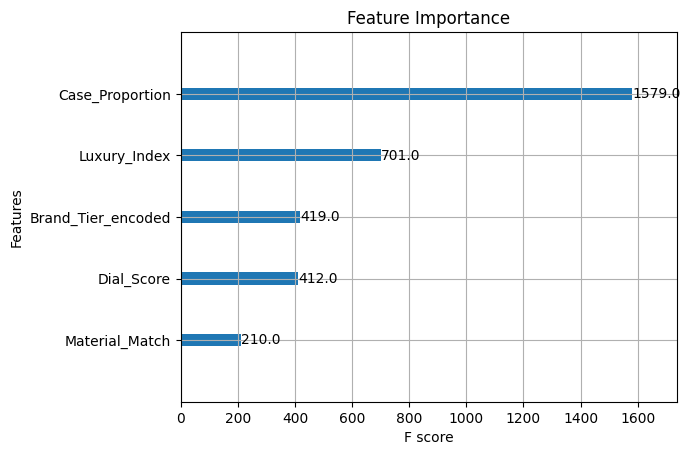

In [7]:
X = df[[
    'Luxury_Index', 'Brand_Tier_encoded', 'Dial_Score',
    'Case_Proportion', 'Has_Power_Reserve', 'Material_Match'
]]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

plt.figure(figsize=(8,6))
xgb.plot_importance(model, importance_type='weight')
plt.title('Feature Importance')
plt.show()

R2 Score: 0.8132
RMSE: 3070.1265
MAE: 2233.5446


<Figure size 800x600 with 0 Axes>

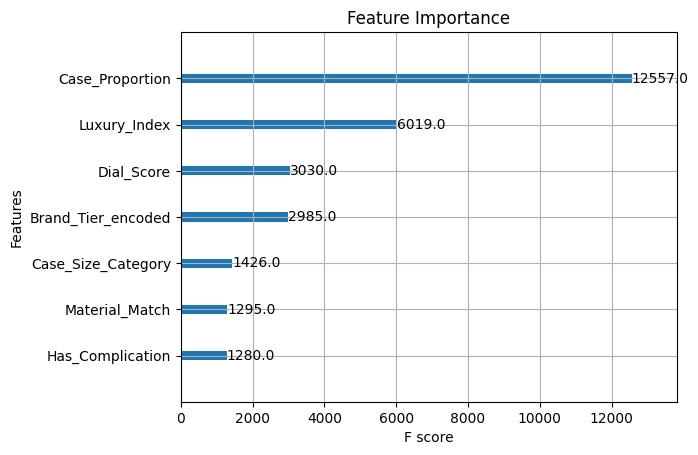

In [12]:
X = df[['Luxury_Index', 'Brand_Tier_encoded', 'Dial_Score', 'Case_Proportion', 'Has_Power_Reserve', 'Material_Match', 'Has_Complication', 'Case_Size_Category']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

plt.figure(figsize=(8,6))
xgb.plot_importance(model, importance_type='weight')
plt.title('Feature Importance')
plt.show()

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Best R2 Score: 0.8607
Tuned R2 Score: 0.8143
Tuned RMSE: 3060.9696


<Figure size 800x600 with 0 Axes>

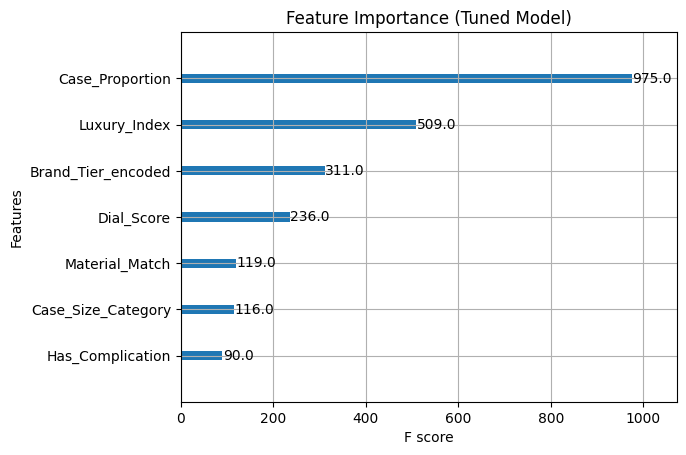

In [15]:
scorer = make_scorer(r2_score)

xgb_model = xgb.XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring=scorer, cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best R2 Score: {grid_search.best_score_:.4f}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Tuned R2 Score: {r2:.4f}')
print(f'Tuned RMSE: {rmse:.4f}')

plt.figure(figsize=(8,6))
xgb.plot_importance(best_model, importance_type='weight')
plt.title('Feature Importance (Tuned Model)')
plt.show()

R2 Score: 0.8143
RMSE: 3060.9696
MAE: 2189.9767


<Figure size 800x600 with 0 Axes>

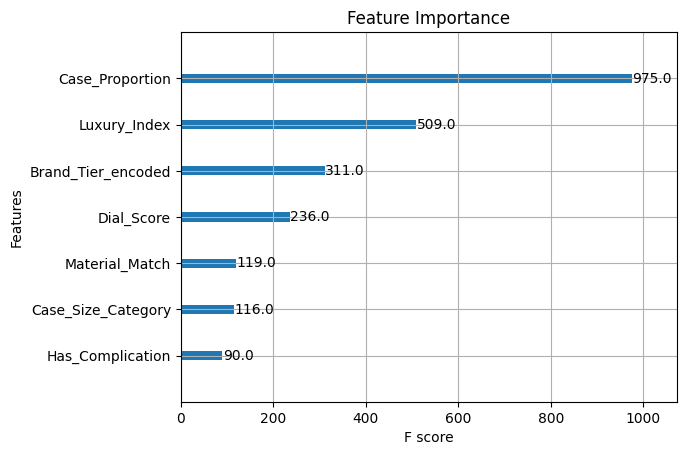

In [14]:
best_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

plt.figure(figsize=(8,6))
xgb.plot_importance(best_model, importance_type='weight')
plt.title('Feature Importance')
plt.show()